# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

# Imports

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

## Step 1: Read in Data

In [2]:
df = pd.read_csv('kc_house_data_train_3.csv', index_col = 0)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mnth_sold
0,2591820310,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014,Oct
1,7974200820,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014,Aug
2,7701450110,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014,Aug
3,9522300010,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015,Mar
4,9510861140,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,750000.0,5.0,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,2015,Mar
17286,8819900270,440000.0,2.0,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,2014,May
17287,3816300095,310000.0,3.0,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,2014,May
17288,122069107,427500.0,3.0,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,2014,Dec


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [3]:
leave = ['price', 'yr_built', 'yr_sold', 'mnth_sold', 'id', 
         'view', 'grade', 'sqft_basement', 'yr_renovated', 
         'long', 'lat', 'no_bld_code_std', 'custom_bld_desgin',
         'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10']
features = [x for x in df.columns if x not in leave]
print(leave)
print(features)

['price', 'yr_built', 'yr_sold', 'mnth_sold', 'id', 'view', 'grade', 'sqft_basement', 'yr_renovated', 'long', 'lat', 'no_bld_code_std', 'custom_bld_desgin', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above', 'zipcode', 'sqft_living15', 'sqft_lot15']


In [4]:
df[features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,zipcode,sqft_living15,sqft_lot15
0,4.0,2.25,2070,8893,2.0,0,4,2070,98058,2390,7700
1,5.0,3.00,2900,6730,1.0,0,5,1830,98115,2370,6283
2,4.0,2.50,3770,10893,2.0,0,3,3770,98006,3710,9685
3,3.0,3.50,4560,14608,2.0,0,3,4560,98034,4050,14226
4,3.0,2.50,2550,5376,2.0,0,3,2550,98052,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...
17285,5.0,2.50,3240,9960,1.0,0,3,2020,98008,2730,10400
17286,2.0,1.75,1300,4000,2.0,0,3,1300,98105,1350,4013
17287,3.0,1.00,1050,9876,1.0,0,3,1050,98028,1760,9403
17288,3.0,1.50,1900,43186,1.5,0,4,1300,98038,2080,108028


### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [5]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)

In [6]:
poly2_data = poly2.fit_transform(df[features])


poly2_columns = poly2.get_feature_names(features)

df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)

df_poly2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,zipcode,sqft_living15,sqft_lot15,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms condition,bedrooms sqft_above,bedrooms zipcode,bedrooms sqft_living15,bedrooms sqft_lot15,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms condition,bathrooms sqft_above,bathrooms zipcode,bathrooms sqft_living15,bathrooms sqft_lot15,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living condition,sqft_living sqft_above,sqft_living zipcode,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot condition,sqft_lot sqft_above,sqft_lot zipcode,sqft_lot sqft_living15,sqft_lot sqft_lot15,floors^2,floors waterfront,floors condition,floors sqft_above,floors zipcode,floors sqft_living15,floors sqft_lot15,waterfront^2,waterfront condition,waterfront sqft_above,waterfront zipcode,waterfront sqft_living15,waterfront sqft_lot15,condition^2,condition sqft_above,condition zipcode,condition sqft_living15,condition sqft_lot15,sqft_above^2,sqft_above zipcode,sqft_above sqft_living15,sqft_above sqft_lot15,zipcode^2,zipcode sqft_living15,zipcode sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2
0,4.0,2.25,2070.0,8893.0,2.0,0.0,4.0,2070.0,98058.0,2390.0,7700.0,16.0,9.0,8280.0,35572.0,8.0,0.0,16.0,8280.0,392232.0,9560.0,30800.0,5.0625,4657.5,20009.25,4.5,0.0,9.0,4657.5,220630.5,5377.5,17325.0,4284900.0,18408510.0,4140.0,0.0,8280.0,4284900.0,202980060.0,4947300.0,15939000.0,79085449.0,17786.0,0.0,35572.0,18408510.0,8.720298e+08,21254270.0,68476100.0,4.0,0.0,8.0,4140.0,196116.0,4780.0,15400.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8280.0,392232.0,9560.0,30800.0,4284900.0,202980060.0,4947300.0,15939000.0,9.615371e+09,234358620.0,7.550466e+08,5712100.0,18403000.0,59290000.0
1,5.0,3.00,2900.0,6730.0,1.0,0.0,5.0,1830.0,98115.0,2370.0,6283.0,25.0,15.0,14500.0,33650.0,5.0,0.0,25.0,9150.0,490575.0,11850.0,31415.0,9.0000,8700.0,20190.00,3.0,0.0,15.0,5490.0,294345.0,7110.0,18849.0,8410000.0,19517000.0,2900.0,0.0,14500.0,5307000.0,284533500.0,6873000.0,18220700.0,45292900.0,6730.0,0.0,33650.0,12315900.0,6.603140e+08,15950100.0,42284590.0,1.0,0.0,5.0,1830.0,98115.0,2370.0,6283.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,9150.0,490575.0,11850.0,31415.0,3348900.0,179550450.0,4337100.0,11497890.0,9.626553e+09,232532550.0,6.164565e+08,5616900.0,14890710.0,39476089.0
2,4.0,2.50,3770.0,10893.0,2.0,0.0,3.0,3770.0,98006.0,3710.0,9685.0,16.0,10.0,15080.0,43572.0,8.0,0.0,12.0,15080.0,392024.0,14840.0,38740.0,6.2500,9425.0,27232.50,5.0,0.0,7.5,9425.0,245015.0,9275.0,24212.5,14212900.0,41066610.0,7540.0,0.0,11310.0,14212900.0,369482620.0,13986700.0,36512450.0,118657449.0,21786.0,0.0,32679.0,41066610.0,1.067579e+09,40413030.0,105498705.0,4.0,0.0,6.0,7540.0,196012.0,7420.0,19370.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11310.0,294018.0,11130.0,29055.0,14212900.0,369482620.0,13986700.0,36512450.0,9.605176e+09,363602260.0,9.491881e+08,13764100.0,35931350.0,93799225.0
3,3.0,3.50,4560.0,14608.0,2.0,0.0,3.0,4560.0,98034.0,4050.0,14226.0,9.0,10.5,13680.0,43824.0,6.0,0.0,9.0,13680.0,294102.0,12150.0,42678.0,12.2500,15960.0,51128.00,7.0,0.0,10.5,15960.0,343119.0,14175.0,49791.0,20793600.0,66612480.0,9120.0,0.0,13680.0,20793600.0,447035040.0,18468000.0,64870560.0,213393664.0,29216.0,0.0,43824.0,66612480.0,1.432081e+09,59162400.0,207813408.0,4.0,0.0,6.0,9120.0,196068.0,8100.0,28452.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13680.0,294102.0,12150.0,42678.0,20793600.0,447035040.0,18468000.0,64870560.0,9.610665e+09,397037700.0,1.394632e+09,16402500.0,57615300.0,202379076.0
4,3.0,2.50,2550.0,5376.0,2.0,0.0,3.0,2550.0,98052.0,2250.0,4050.0,9.0,7.5,7650.0,16128.0,6.0,0.0,9.0,7650.0,294156.0,6750.0,12150.0,6.2500,6375.0,13440.00,5.0,0.0,7.5,6375.0,245130.0,5625.0,10125.0,6502500.0,13708800.0,5100.0,0.0,7650.0,6502500.0,250032600.0,5737500.0,10327500.0,28901376.0,1075

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [7]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

In [8]:
#call train_test_split on the data and capture the results
X_poly2_train, X_poly2_test, y_train, y_test = train_test_split(df_poly2, df['price'], random_state=34,test_size=0.2)

In [9]:
#check the shape of the results
print("Training set - Features: ", X_poly2_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", X_poly2_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 77) Target:  (13832,)
Testing set - Features:  (3458, 77) Target:  (3458,)


### 5.1) Perform a train-test split of the data.

### 5.2) Fit your scaler to training the data.

In [10]:
# from sklearn.preprocessing import StandardScaler

poly2_scaler = StandardScaler()


#fit and transform the training data
Xs_poly2_train = pd.DataFrame(data=poly2_scaler.fit_transform(X_poly2_train), columns=df_poly2.columns)


### 5.3) Transform the testing set with the scaler.

In [11]:
#transform the testing dat
Xs_poly2_test = pd.DataFrame(data=poly2_scaler.transform(X_poly2_test), columns=df_poly2.columns)

### 5.4) Fit the model to the training data.

In [12]:
# instantiate a linear regression object
lm_poly2 = LinearRegression()

#fit the linear regression to the data
lm_poly2 = lm_poly2.fit(X_poly2_train, y_train)

y_train_pred = lm_poly2.predict(X_poly2_train)

poly2_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Polynomial Training Root Mean Squared Error:' , poly2_train_rmse)

Polynomial Training Root Mean Squared Error: 210822.02271478783


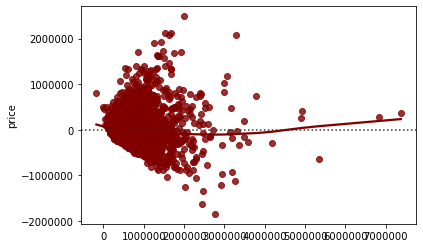

In [13]:
sns.residplot(y_train_pred, y_train, lowess=True, color="maroon")

### 5.5) Use the model to predict on the training set and the test set.

In [14]:
y_train_pred = lm_poly2.predict(X_poly2_train)
y_test_pred = lm_poly2.predict(X_poly2_test)

poly2_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
poly2_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

### 5.6) Evaluate the training and test predictions using RMSE.

In [15]:
print('Polynomial Training Root Mean Squared Error:' , poly2_train_rmse)
print('Polynomial Testing Root Mean Squared Error:' , poly2_test_rmse)

Polynomial Training Root Mean Squared Error: 210822.02271478783
Polynomial Testing Root Mean Squared Error: 231594.71893560182


### 5.7) Determine if your model is overfit.

In [16]:
print('Training: ', int(poly2_train_rmse), "vs. Testing: ", int(poly2_test_rmse))

Training:  210822 vs. Testing:  231594


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

# KBest

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=5) # select the 200 best features using their f-statistic

selector.fit(X_poly2_train, y_train)

SelectKBest(k=5, score_func=<function f_regression at 0x000001FB358A00D0>)

In [18]:
selected_poly2_columns = X_poly2_train.columns[selector.get_support()] # shows me all the columns htat are kept
removed_poly2_columns = X_poly2_train.columns[~selector.get_support()] # shows me all the columns htat are not kept
Xsc_poly2_train = X_poly2_train[selected_poly2_columns]
Xsc_poly2_test = X_poly2_test[selected_poly2_columns]

In [19]:
#instantiate a linear regression object
lm_poly2_kbest = LinearRegression()

#fit the linear regression to the data
lm_poly2_kbest.fit(Xsc_poly2_train, y_train)

y_train_kbest = lm_poly2_kbest.predict(Xsc_poly2_train)


p2_trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , p2_trainK_rmse)

y_kbest = lm_poly2_kbest.predict(Xsc_poly2_test)

p2_testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , p2_testK_rmse)




Training Root Mean Squared Error: 244633.5172208283
Testing Root Mean Squared Error: 273843.954275142


### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [20]:
df[features].shape

(17290, 11)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


[variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
vif["features"] = df[features].columns
vif.round(1)

,VIF Factor,features
0,24.3,bedrooms
1,24.2,bathrooms
2,46.1,sqft_living
3,2.2,sqft_lot
4,15.9,floors
5,1.0,waterfront
6,31.1,condition
7,35.1,sqft_above
8,61.6,zipcode
9,23.5,sqft_living15


In [22]:
from sklearn.feature_selection import RFECV

ols = LinearRegression()

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=7, scoring='neg_mean_squared_error', n_jobs=10, verbose=0)

# Fit recursive feature eliminator 
selector.fit(Xsc_poly2_train, y_train)

RFECV(cv=7,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=10, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [23]:
selected_poly2_rfe = Xsc_poly2_train.columns[selector.support_]
removed_poly2_rfe = Xsc_poly2_train.columns[~selector.support_]

In [24]:
list(removed_poly2_rfe)

len(list(selected_poly2_rfe))

5

## Step 7: Evaluate your different models in order to determine the best model overall.

In [25]:
#instantiate a linear regression object
lm_poly2_rfe = LinearRegression()

#fit the linear regression to the data
lm_poly2_rfe = lm_poly2_rfe.fit(X_poly2_train[selected_poly2_rfe], y_train)

y_rfe = lm_poly2_rfe.predict(X_poly2_train[selected_poly2_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_poly2_rfe.predict(X_poly2_test[selected_poly2_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)




Training Root Mean Squared Error: 244633.5172208283
Testing Root Mean Squared Error: 273843.954275142


## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/